In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
orig=np.load('young_image.npy')
orig_old=np.load('old_image.npy')

In [4]:
#CV1
a1=np.load('IG_result_cv1_m1_y.npy')
a2=np.load('IG_result_cv1_m2_y.npy')
a3=np.load('IG_result_cv1_m3_y.npy')
a=abs(a1)+abs(a2)+abs(a3)

In [14]:
#CV2
a1=np.load('young_IG_result_cv2_m1.npy')
a2=np.load('young_IG_result_cv2_m2.npy')
a3=np.load('young_IG_result_cv2_m3.npy')
a=abs(a1)+abs(a2)+abs(a3)

In [37]:
#CV3
a1=np.load('young_IG_result_cv3_m1.npy')
a2=np.load('young_IG_result_cv3_m2.npy')
a3=np.load('young_IG_result_cv3_m3.npy')
a=abs(a1)+abs(a2)+abs(a3)

In [34]:
#CV4
a1=np.load('young_IG_result_cv4_m1.npy')
a2=np.load('young_IG_result_cv4_m2.npy')
a3=np.load('young_IG_result_cv4_m3.npy')
a=abs(a1)+abs(a2)+abs(a3)

In [2]:
#IG derived again from CV2
a1=np.load('young_IG100_result_cv2_m1.npy')
a2=np.load('young_IG100_result_cv2_m2.npy')
a3=np.load('young_IG100_result_cv2_m3.npy')
a=abs(a1)+abs(a2)+abs(a3)


(2097152,)


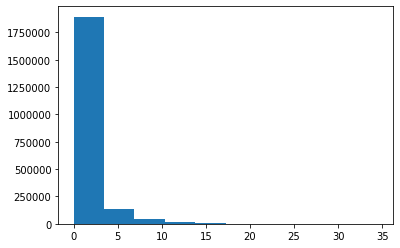

In [3]:
a_list=a.reshape(128*128*128)
print(a_list.shape)
hist,bins=np.histogram(a_list)
plt.hist(a_list, bins=bins)
plt.show()

In [4]:
a_abs=abs(a)
index=np.where(a_abs<10)
highlight=a
highlight[index]=0
highlight_abs=abs(highlight)

In [6]:
table=np.zeros(shape=(128,2))
for i in range(128):
    table[i,0]=i
    k=highlight_abs[i,:,:,0].max()
    if k!=0:
        print('maximum value : '+ str(k)+ ' in ' + str(i)+'th level')
        table[i,1]=k
        


maximum value : 10.870313 in 21th level
maximum value : 10.545481 in 22th level
maximum value : 11.393378 in 28th level
maximum value : 12.15308 in 29th level
maximum value : 12.23101 in 30th level
maximum value : 11.807157 in 31th level
maximum value : 11.589997 in 32th level
maximum value : 11.752629 in 33th level
maximum value : 12.498253 in 34th level
maximum value : 13.334964 in 35th level
maximum value : 14.160135 in 36th level
maximum value : 14.563124 in 37th level
maximum value : 14.611849 in 38th level
maximum value : 15.090451 in 39th level
maximum value : 16.325476 in 40th level
maximum value : 17.268011 in 41th level
maximum value : 19.517641 in 42th level
maximum value : 21.747982 in 43th level
maximum value : 16.309134 in 44th level
maximum value : 14.830047 in 45th level
maximum value : 13.420904 in 46th level
maximum value : 13.795241 in 47th level
maximum value : 14.32362 in 48th level
maximum value : 15.1958685 in 49th level
maximum value : 17.197065 in 50th level
ma

In [7]:
test=highlight_abs[:,:,:,0]+orig[:,:,:,0]

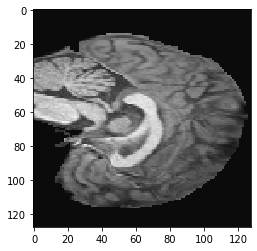

In [8]:
plt.imshow(orig[63,:,:,0],cmap='gray',interpolation='nearest',alpha=10)

In [9]:
highlight_abs[highlight_abs == 0.0] = np.nan

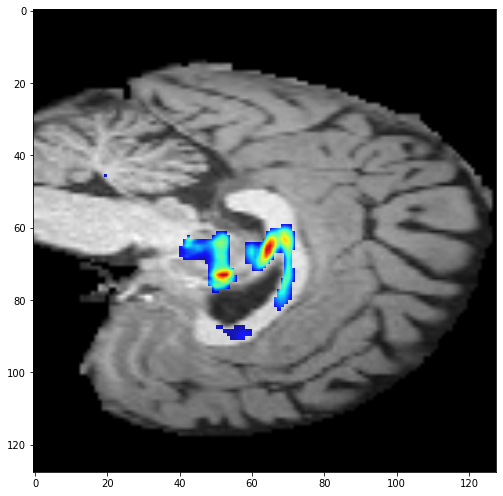

In [16]:
#im1 = plt.imshow(test[64,:,:], cmap='gray', interpolation='bilinear',extent=extent)
x_coord=62
im1=plt.imshow(orig[x_coord,:,:,0],cmap='gray',interpolation='bilinear')
im2=plt.imshow(highlight_abs[x_coord,:,:,0],cmap='jet', alpha=.9, interpolation='bilinear')
#plt.colorbar()
plt.show()

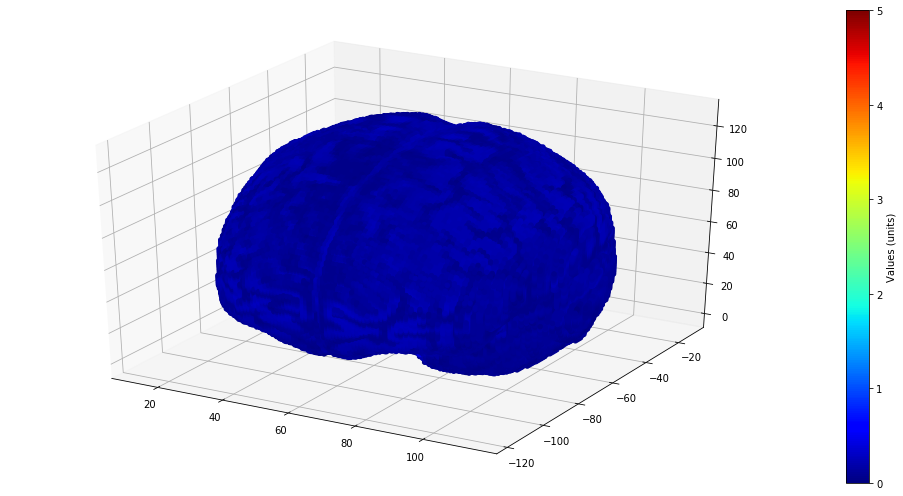

In [15]:
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = orig_old[:,:,:,0]
x, y, z = data.nonzero()
col = data.flatten()
col=col[col.nonzero()]
k=ax.scatter(x,-y,z, c=col, cmap='jet',vmin=0,vmax=5, alpha=1)
cbar=plt.colorbar(k)
cbar.set_label("Values (units)")
plt.show()

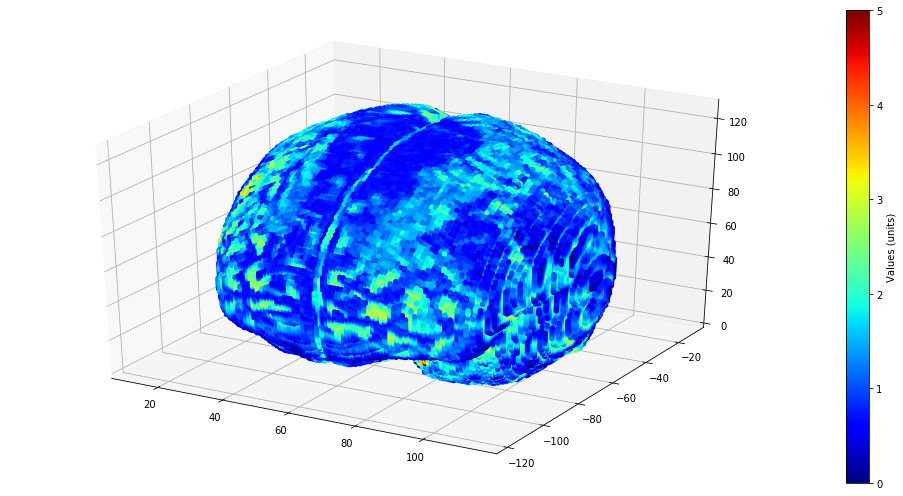

In [17]:
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
data = orig[:,:,:,0]
x, y, z = data.nonzero()
col = data.flatten()
col=col[col.nonzero()]
ax.set_zlim(0,128)
k=ax.scatter(x,-y,z, c=col, cmap='jet',vmin=0,vmax=5, alpha=1)
cbar=plt.colorbar(k)
cbar.set_label("Values (units)")
plt.show()

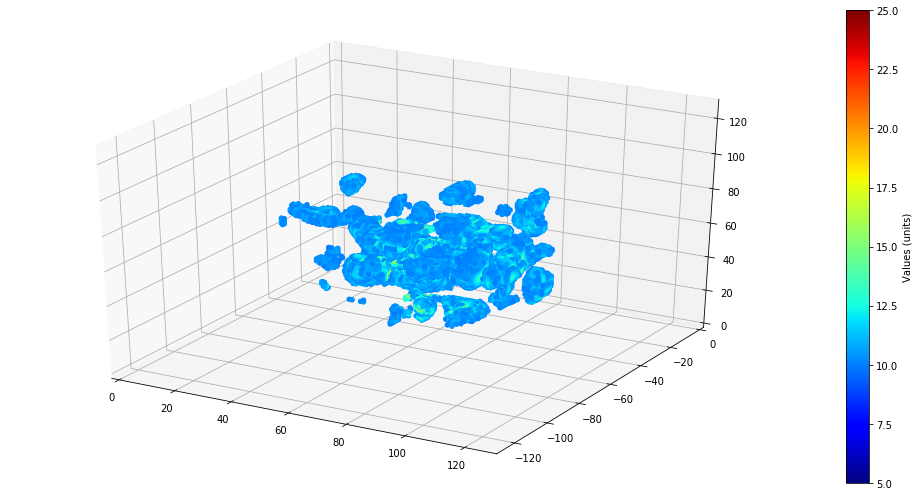

In [18]:
plt.rcParams["figure.figsize"] = [14.00, 7.00]
plt.rcParams["figure.autolayout"] = True


fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(0,128)
ax.set_ylim(-128,0)
ax.set_zlim(0,128)
data = highlight_abs[:,:,:,0]
x, y, z = data.nonzero()
col = data.flatten()
col=col[col.nonzero()]
#ax.set_ylim(ax.get_ylim()[::-1])
k=ax.scatter(x,-y,z, c=col, cmap='jet',vmin=5,vmax=25, alpha=1)

#k=ax.set_ylim(ax.get_ylim()[::-1])
cbar=plt.colorbar(k)
cbar.set_label("Values (units)")
plt.show()